<a href="https://colab.research.google.com/github/BossOfTheCode/ml/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

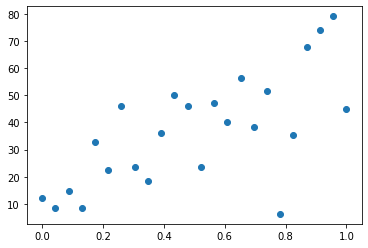

In [ ]:
plt.scatter(x, y);

In [ ]:
X1 = list(zip(np.ones(24), x))
W1 = np.linalg.lstsq(X1, y, rcond=None)[0]
X2 = list(zip(np.ones(24), x, x*x))
W2 = np.linalg.lstsq(X2, y, rcond=None)[0]
X3 = list(zip(np.ones(24), x, x*x, x*x*x))
W3 = np.linalg.lstsq(X3, y, rcond=None)[0]

In [ ]:
def f1(x, w): 
    return w[0] + w[1]*x
def f2(x, w): 
    return w[0] + w[1]*x + w[2]*x**2
def f3(x, w): 
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3
def exp(x, a, b):
    return a * np.exp(b * x)

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(exp, x, y, maxfev = 5000)

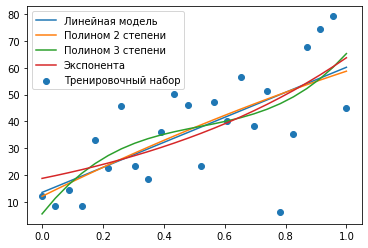

In [ ]:
plt.scatter(x, y, label='Тренировочный набор')
plt.plot(x, f1(x, W1), label='Линейная модель')
plt.plot(x, f2(x, W2), label='Полином 2 степени')
plt.plot(x, f3(x, W3), label='Полином 3 степени')
plt.plot(x, exp(x, *popt), label = 'Экспонента')
plt.legend();

In [ ]:
print(mean_squared_error(y, f1(x, W1)))
print(mean_squared_error(y, f2(x, W2)))
print(mean_squared_error(y, f3(x, W3)))
print(mean_squared_error(y, exp(x, *popt)))

213.13469863888886
212.59353678557318
202.51303659090908
220.06418367065143


Лучшая модель - полином 3 степени


#Задание 2

In [51]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)

In [52]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_lr = linear_regressor.predict(X_test)

In [53]:
print('MSE = ', mean_squared_error(y_test, y_pred_lr))
print('R2 score = ', r2_score(y_test, y_pred_lr))

MSE =  2900.1732878832318
R2 score =  0.452606602161738


In [54]:
import pandas as pd

alphas = np.array([1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.1, 0, 1, 5, 10, 20])
Ridge_regressor = linear_model.Ridge()
Lasso_regressor = linear_model.Lasso()
ElasticNet_regressor = linear_model.ElasticNet()
MSE_array = []
R2_array = []
models = {'Ridge': Ridge_regressor, 
          'Lasso': Lasso_regressor, 
          'ElasticNet': ElasticNet_regressor}
for model in models:
  y_pred = models.get(model).fit(X_train, y_train).predict(X_test)
  MSE_array.append(mean_squared_error(y_test, y_pred))
  R2_array.append(r2_score(y_test, y_pred))
print('MSE: ', MSE_array)
print('R2: ', R2_array)

MSE:  [3077.4142782200897, 3403.5701919165826, 5311.212718027376]
R2:  [0.4191532397912693, 0.3575929204237066, -0.0024651935487560728]


Теперь подберем параметры при помощи GridSearch

In [55]:
for model in models:
  grid = GridSearchCV(estimator=models.get(model), param_grid=dict(alpha=alphas))
  grid.fit(X_train, y_train)
  print(model + ' alpha = ' + str(grid.best_estimator_.alpha))

Ridge alpha = 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411830.16723206366, tolerance: 170.60753794326243
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393967.7448385386, tolerance: 175.81917730496454
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412617.319272269, tolerance: 175.48584432624114
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400130.15

Lasso alpha = 0.1
ElasticNet alpha = 0.001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393968.2320893436, tolerance: 175.81917730496454
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412618.9560462669, tolerance: 175.48584432624114
  positive)
/usr/local/lib/py

In [56]:
Ridge = linear_model.Ridge(alpha=0.1)
Lasso = linear_model.Lasso(alpha=0.1)
Elastic = linear_model.ElasticNet(alpha = 0.001)
MSE_array = []
R2_array = []
models = {'Ridge': Ridge, 
          'Lasso': Lasso, 
          'ElasticNet': Elastic}
for model in models:
  y_pred = models.get(model).fit(X_train, y_train).predict(X_test)
  MSE_array.append(mean_squared_error(y_test, y_pred))
  R2_array.append(r2_score(y_test, y_pred))
print('MSE: ', MSE_array)
print('R2: ', R2_array)

MSE:  [2856.4817315700866, 2798.190968742363, 2853.340799138245]
R2:  [0.46085316782973296, 0.47185526169086933, 0.4614460033280219]


MSE для каждой модели уменьшился. Лучшей моделью оказалась LASSO регрессия, так как у нее наименьший MSE.